<a href="https://colab.research.google.com/github/saurav1199s/competitive_coding/blob/master/Sprint1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://bit.ly/stormspeed

--2020-12-22 11:23:27--  https://bit.ly/stormspeed
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://drivendata-public-assets.s3.amazonaws.com/re-train-images.tgz [following]
--2020-12-22 11:23:27--  https://drivendata-public-assets.s3.amazonaws.com/re-train-images.tgz
Resolving drivendata-public-assets.s3.amazonaws.com (drivendata-public-assets.s3.amazonaws.com)... 52.217.18.44
Connecting to drivendata-public-assets.s3.amazonaws.com (drivendata-public-assets.s3.amazonaws.com)|52.217.18.44|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977919710 (933M) [application/gzip]
Saving to: ‘stormspeed’

stormspeed          100%[===================>] 932.62M  61.3MB/s    in 14s     

2020-12-22 11:23:42 (64.5 MB/s) - ‘stormspeed’ saved [977919710/977919710]



In [ ]:
!tar -xvzf stormspeed

Streaming output truncated to the last 5000 lines.
train/cpf_058.jpg
train/zus_147.jpg
train/ing_374.jpg
train/ftb_055.jpg
train/nrf_008.jpg
train/meg_051.jpg
train/scw_000.jpg
train/tkb_236.jpg
train/ewt_085.jpg
train/zmi_202.jpg
train/iwp_012.jpg
train/dzw_180.jpg
train/cti_148.jpg
train/ise_178.jpg
train/xjj_091.jpg
train/hht_109.jpg
train/dva_025.jpg
train/zny_076.jpg
train/fhl_069.jpg
train/ing_412.jpg
train/hig_212.jpg
train/ggv_079.jpg
train/vye_451.jpg
train/cfk_007.jpg
train/iag_037.jpg
train/vkb_329.jpg
train/hkz_045.jpg
train/wtg_021.jpg
train/rml_217.jpg
train/jkh_046.jpg
train/azm_042.jpg
train/vrx_078.jpg
train/tmx_017.jpg
train/hdi_009.jpg
train/qpq_306.jpg
train/kqu_207.jpg
train/rer_023.jpg
train/vlo_151.jpg
train/ipa_282.jpg
train/fcr_583.jpg
train/soo_051.jpg
train/yfj_043.jpg
train/ywf_040.jpg
train/kgc_031.jpg
train/viw_018.jpg
train/cva_082.jpg
train/gtn_158.jpg
train/abs_045.jpg
train/rml_203.jpg
train/tmx_003.jpg
train/azm_056.jpg
train/cem_039.jpg
train/jkh_052

# **data visualization and exploration**

In [2]:
import os

path = os.path.join("drive", "MyDrive", "Documentation - Saurav", "wspeed-meta-labels")

os.listdir(path)

['training_set_features.csv', 'training_set_labels.csv']

In [3]:
import pandas as pd

train_set_features = pd.read_csv(os.path.join(path, 'training_set_features.csv'), index_col="image_id")

train_set_features.head()

storm_id  relative_time  ocean
image_id                               
abs_000       abs              0      2
abs_001       abs           1800      2
abs_002       abs           5400      2
abs_003       abs          17999      2
abs_004       abs          19799      2

In [4]:
train_set_labels = pd.read_csv(os.path.join(path, 'training_set_labels.csv'), index_col="image_id")

train_set_labels.head()

wind_speed
image_id            
abs_000           43
abs_001           44
abs_002           45
abs_003           52
abs_004           53

In [5]:
train_set = pd.merge(train_set_features, train_set_labels, how='left', on='image_id').sort_values(by="relative_time")
train_set.head()

storm_id  relative_time  ocean  wind_speed
image_id                                           
abs_000       abs              0      2          43
sqs_000       sqs              0      2          20
icx_000       icx              0      2          65
vaj_000       vaj              0      1          30
tnn_000       tnn              0      1          30

In [6]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Text(0.5, 1.0, 'ocean 1')

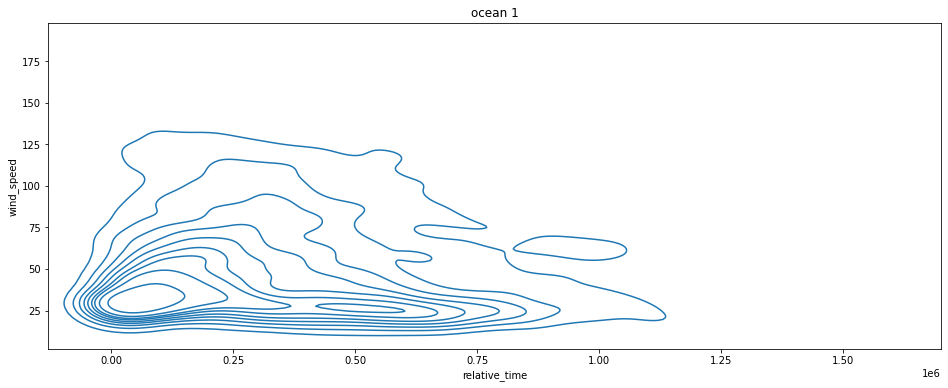

In [ ]:
plt.figure(figsize=(16, 6))
sns.kdeplot(data=train_set[train_set['ocean'] == 1], x='relative_time', y='wind_speed').set_title('ocean 1')

Text(0.5, 1.0, 'ocean 2')

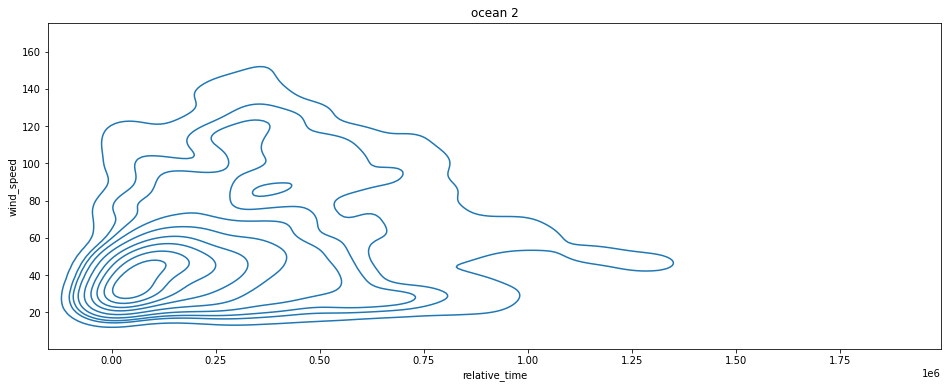

In [ ]:
plt.figure(figsize=(16, 6))
sns.kdeplot(data=train_set[train_set['ocean'] == 2], x='relative_time', y='wind_speed').set_title('ocean 2')

<Figure size 576x576 with 0 Axes>

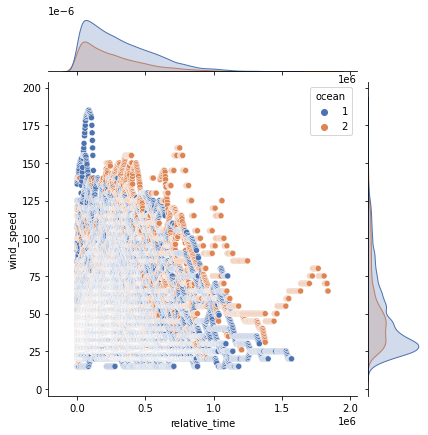

In [ ]:
plt.figure(figsize=(8, 8))
sns.jointplot(data=train_set, y='wind_speed', x='relative_time', hue='ocean', palette='deep')

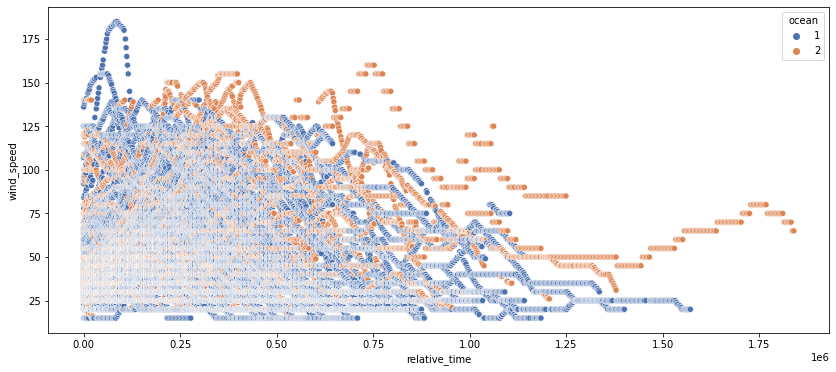

In [ ]:
plt.figure(figsize=(14, 6))
sns.scatterplot(data=train_set, x='relative_time', y='wind_speed', hue='ocean', palette="deep")

In [7]:
storm_id = train_set['storm_id'].unique()

In [8]:
storm_data = train_set[train_set['storm_id'] == storm_id[0]][['relative_time', 'wind_speed']].rename(columns={'wind_speed': storm_id[0]})

for i in range(1, storm_id.shape[0]):
  t_data = train_set[train_set['storm_id'] == storm_id[i]][['relative_time', 'wind_speed']].rename(columns={'wind_speed': storm_id[i]})
  storm_data = pd.merge(storm_data, t_data, how='outer', on='relative_time')

In [9]:
storm_data = storm_data.sort_values(by='relative_time').set_index('relative_time')
storm_data

abs   sqs   icx   vaj   tnn  ...   amw   avn   ggy   zvv   kxo
relative_time                                ...                              
0              43.0  20.0  65.0  30.0  30.0  ...  25.0  25.0  30.0  60.0  30.0
1798            NaN   NaN   NaN   NaN  31.0  ...   NaN   NaN   NaN   NaN   NaN
1799            NaN  20.0   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN
1800           44.0   NaN  65.0   NaN   NaN  ...  26.0   NaN  31.0  61.0   NaN
1801            NaN   NaN   NaN  31.0   NaN  ...   NaN   NaN   NaN   NaN  31.0
...             ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...
1825204         NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN
1828804         NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN
1832405         NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN
1836005         NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN
1839605         NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN

[5414 rows x 494 columns]

In [ ]:
plt.figure(figsize=(256, 256))
sns.heatmap(data=storm_data, square=True)

In [10]:
storm_data.reset_index(inplace=True)

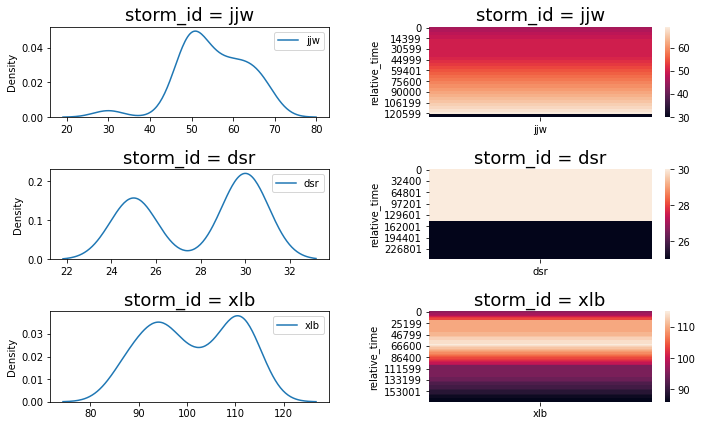

In [11]:
import random
from datetime import datetime

random.seed(datetime.now())

fig, axs = plt.subplots(3, ncols=2)
fig.set_figheight(6)
fig.set_figwidth(10)

for i in range(0, 3):
  temp = random.randint(0, storm_id.shape[0])
  t_data = storm_data[['relative_time', storm_id[temp]]].dropna()
  t_data.set_index('relative_time', inplace=True)
  sns.kdeplot(data=t_data, ax=axs[i][0])
  axs[i][0].set_title("storm_id = " + storm_id[temp], {'fontsize': 18})

  # sns.histplot(data=t_data, ax=axs[i][1])
  # axs[i][1].set_title("storm_id = " + storm_id[i], {'fontsize': 18})

  # sns.barplot(data=t_data, ax=axs[i][2])
  # axs[i][2].set_title("storm_id = " + storm_id[i], {'fontsize': 18})

  sns.heatmap(data=t_data, ax=axs[i][1])
  axs[i][1].set_title("storm_id = " + storm_id[temp], {'fontsize': 18}) 

plt.tight_layout(pad=1, w_pad=4, h_pad=1.5)

# **data preprocessing**